# Numerical Methods 04-3: Back to Where we Started

## Gabriel M Steward

### February 2023

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

[Problem 1](#P1) (The only one)

<a id='P1'></a>

# Problem 1 \[Back to [top](#toc)\]
$$\label{P1}$$

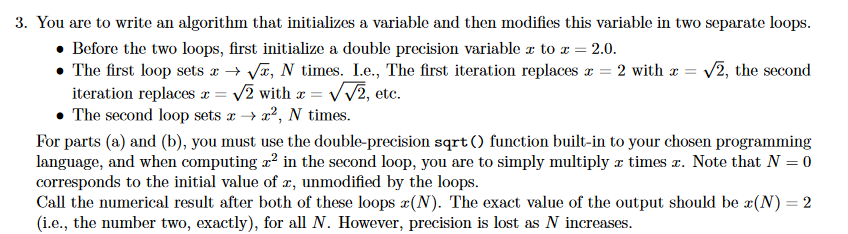

This is ac5tually quite simple to implement, as it's just two loops performing a simple mathematical operation. IF we had to make the square root function ourself, that would be quite difficult, but we do not have to do that. 

Even though the code is only a handful of lines, we still put it in the Code section for the sake of the instructions. 

We tested with a value of N=5 and got 2 followed by 14 zeroes. We looked ahead and decided to test N=50 and got a number significantly less than 2, 1.64872126455095e+00. We tested until we found the last number that has apparent perfect agreement, and that turns out to be N=6, curiously enough, our initial point was very close to the maximumally accurate value.

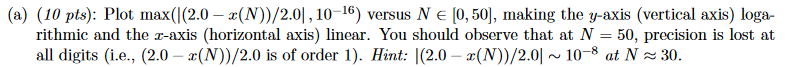

For this we adjsuted the program to loop through all values of N from 0 to 50, and to print the results.

We also used our absolute value funct5ion from the previous homeworks. 

Anyway, the code is a little better than the problem statement implies. FOr instance, N=30 has 9 digits of agreement, while N=50 has 1 (not zero). That said N=49 is 2 digits of agreement, so we predict that N=51 is zero. 

(In truth, it actually does this at step 52, where the value it "approxiamtes" is 1.0, meaning the maximum amount of digits of agreement is acutally 0.5 before it gets stuck in a loop.) 

The program reveals that even step 1 does not perfeclty agree, as the error term is not zero. It is only zero *when* N=0. 

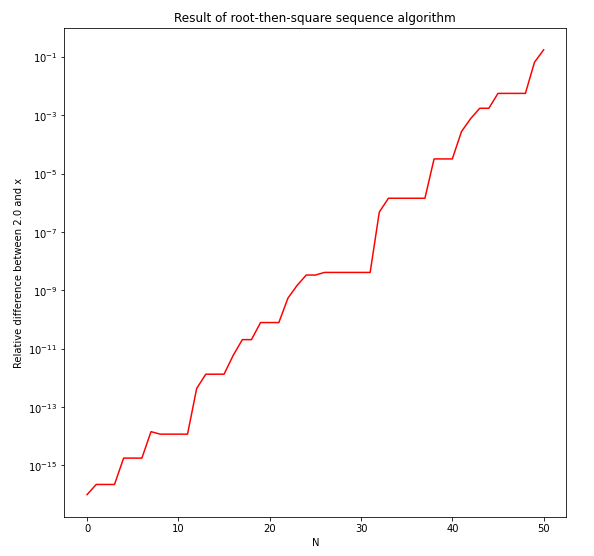

this reveals something somewhat odd about the results--rather than gradually increasing in error, as expected, we have this "stepper" situation where the error jumps up, flatlines, and then jumps up again. This probably reveals some unusual idiosyncrocy for how sqrt(x) actually evaluates square roots in C, with every step likely representing a poitn where the algorithm has more difficulty finding the answer. Although, it is interesting how it doesn't get "stuck" at a certain value in an infinite loop but manages to continue on anyway. 

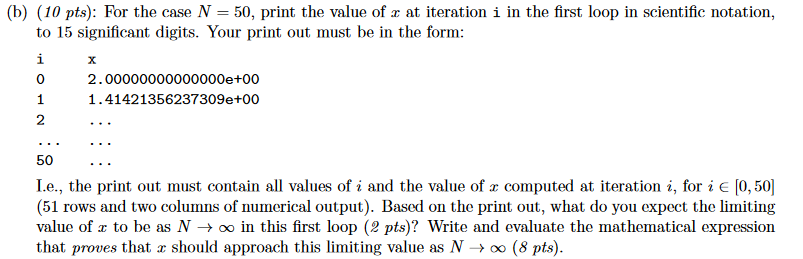

Well we kind of already extended the result in a) by ourselves so we already know the answer, but let's follow through anyway. The program will not be changed, it's just that some print statements will be disabled and others enabled. 

We do not reproduce the full printout here (that can be found in the source code document), but here's a small taste of it:


```
i 	 x
0 	 2.00000000000000e+00
1 	 1.41421356237310e+00
2 	 1.18920711500272e+00
3 	 1.09050773266526e+00
...
47 	 1.00000000000000e+00
48 	 1.00000000000000e+00
49 	 1.00000000000000e+00
50 	 1.00000000000000e+00
```

This very clearly is going to 1, and in fact looks identical to 1 as far as the 15 printed digits are concerned. (If we take it to 16 digits, 50 is still equivalent to 1, but the ones before it are not). That said, even N=50 must not evaluate to machine 1, since the squaring returns us to a non-1 value at the end of the evaluation. 

For a mathematical proof, consider what we are doing. 

$$ \sqrt{2}, \sqrt{\sqrt{2}}, \sqrt{\sqrt{\sqrt{2}}}, ...$$

This is equivalent to

$$ \sqrt{2},^4\sqrt{2},^6\sqrt{2} ...$$

Which means that, in essence, the "final" term would be as n approaches infinity for...

$$ \phantom{ }^n\sqrt{2} $$

This can be rewritten as 

$$ 2^{1/n} $$

As we take n to infinity, this is a well-known limit. 1/n approaches zero, and $2^0 = 1$. Thus, in the limit, our sequence will inevitably reach 1 the moment we bump up against machine resolution. (Which we did see when we experimented with part a), noting that max error was 0.5). 

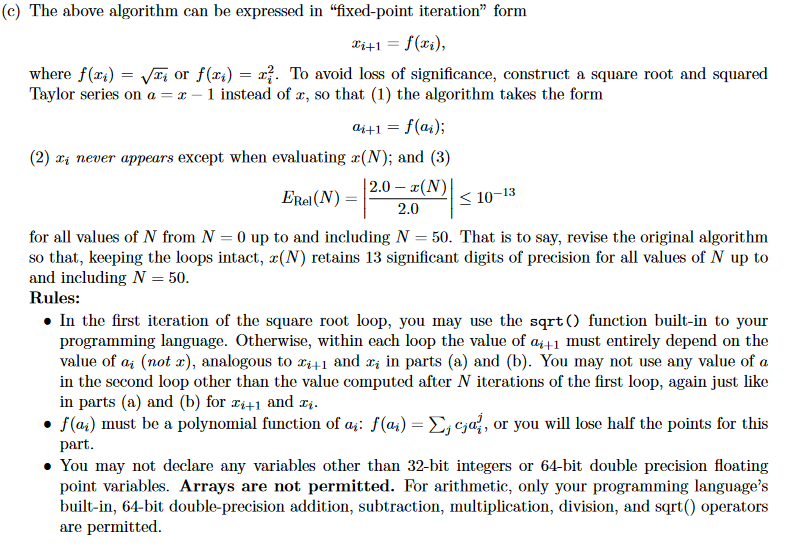

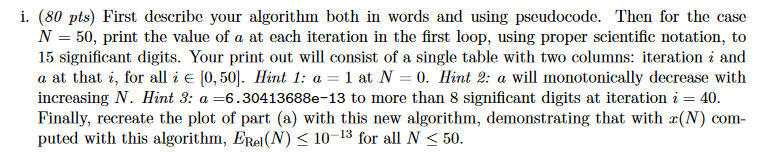

This is going to require some mathematical pre-work first. Notably, we wish to redefine the problem in terms of a rather than x. For now, we have $\sqrt{x}$ and $x^2$. a=x-1, so x=a+1. Except a simple substitution won't do it, for we also need to figure out what the *new a* will be, right now we juast have $x_{i+1} = \sqrt{a +1}$, but we can still be saved, sicne the a and x relation holds. $a_{i+1} + 1 = \sqrt{a_i+1}$ or...

$$ a_{i+1} = \sqrt{a_i + 1} - 1$$
$$ a_{i+1} = (a_i+1)^2 - 1 $$  

Now, we want *both* of these in polynomial form, as requested by the problem. The second case is easy, just multiply it out and combine like terms.

$$ a_{i+1} = a_i^2 + 2a_i $$  

For the other one, though, needs a Taylor Series. This is not too difficult, we can take as many derivatives as we want:

$$ (a_i+1)^{1/2} - 1 \rightarrow \frac{1}{2} (a_i+1)^{-1/2} \rightarrow \frac{-1}{4}(a_i+1)^{-3/2} \rightarrow \frac{3}{8}(a_i+1)^{-5/2} \rightarrow ... $$

Ignoring the original function, the deritavies take the form

$$ \frac{(2n-1)!! (-1)^{n-1}}{2^n}(a_i+1)^{\frac{-2n+1}{2}} $$

The only problem here is evaluating that fractional power, we wish to avoid that. A simple ay to do that is to set the argument inside the fractional exponent to 1, that is, set a to 0. There is nothing at all wrong with expanding around 0! In fact, we are workign where x=2, or a=1, which means we are only 1 unit away. Assuming the Taylor Series behaves well, this should still give us good data.

So, expanding around a=0, the derivative parts of the coefficients are now...

$$ \frac{(2n-3)!! (-1)^{n-1}}{2^n} $$

Save for the first derivative, where the double factorial is just replaced with 1.

Adding the factorial and exponential parts, we get...

$$ \frac{(2n-3)!! (-1)^{n-1}}{n! 2^n}a_i^n $$

This is the form of every term in the Taylor Series except the first derivative and the n=0 term. The n=0 term is just the original function evaluated at a=0. This, as it happens, also turns out to be 0. We already discussed the first derivative. Thus our full Taylor Series is

$$ a_{i+1} = \frac{1}{2}a_i + \sum_{n=2}^\infty \frac{(2n-3)!! (-1)^{n-1}}{n! 2^n} a_i^n $$

And we already programmed all the prerequisite functions to evaluate this in previous homeworks, neat. The best part about this Taylor Series is that we can program it arbitrarily, and just select as many n as we want to get arbitrary precision. We also note that this is in polynomial form, as requested, though the coefficient is slightly ugly.  

So, how will the algorithm work? Simple, really, all we need to do is replace a few lines in the code. There will be some variable declarations to give us both a and x, even though we will be working almost exclusively in a. Where we would have set x = sqrt(x) instead we will rely on the Taylor Series we found. (Except for the first step, where we use sqrt(), as we are permitted to do, likely becasue accuracy is low for a point that far away).

$$ a_{i+1} = \frac{1}{2}a_i + \sum_{n=2}^\infty \frac{(2n-3)!! (-1)^{n-1}}{n! 2^n} a_i^n $$

It would be possible to hard-code this as one line, but we want variability in our code, so we'll instead create it in a custom loop. Whatever hte value of n is, that's how many terms we will compute. This will necessitate the declaration of a new variable, aBuffer, which will hold the value of the taylor series expansion as each individual term is calculated. Once the terms are all calculated and added together, then we set a to this sum. 

This will be done repeatedly until we hit N, at which case we transfer over to the replacement for x=x*x. This is still a series, but one that terminates, so it shall be coded in a single line. After that, we will print out our result and be done. Add print statements in the midst of all this to report other data as desired.

Despite the code being simple, pseudocode is still requested. Here it is.

```
x = 2.0
maxN = 50
n = 10 //or whatever number we want to take the taylor series to.
for (N = 0, N <= maxN) //iterates from 0 to 50, doing every step. 
    x = 2.0 //make sure to reset initial values every N. 
    a = x - 1.0
    for (i = 0, i < N)
        if (i==0) 
            a = sqrt(a+1.0)-1.0 //first time evaluation only. 
        else
            aBuffer = 0.5 * a
            for (j = 2, j <= n) //make sure to get all Taylor terms. 
                aBuffer = aBuffer + (a^n)((2.0*n-3.0)!!*(-1.0)^(n-1.0))(n! * 2^n)
                //Naturally all these functions will use our custom definitions that are already made.
                j++
            a = aBuffer 
        //put an if statement here if we desire to print the process for a specific value of N.
        ++i
    for (i = 0, i < N)
        a = a*a + 2*a
    x = a
    print(N, x)
    ++N   
```

This is the pesudocode. Naturally, we actually implemented this. 

The code is in the coding section of the assignment, naturally. The table akin to part b)'s table is also there, but a shortened version of it is here:

```
i 	 a
0 	 1.00000000000000e+00
1 	 4.14213562373095e-01
2 	 1.89207115002721e-01
3 	 9.05077326652577e-02
...
40 	 6.30413688268311e-13
...
47 	 4.92510693959464e-15
48 	 2.46255346979732e-15
49 	 1.23127673489866e-15
50 	 6.15638367449329e-16

```

Notably a gets very small at the end, to the point of hitting roundoff, and the i=40 step does in fact have a -13 exponent. 

The same code also produces the data by which the following graph is made, it's just a matter of commenting/uncommenting print statements. 

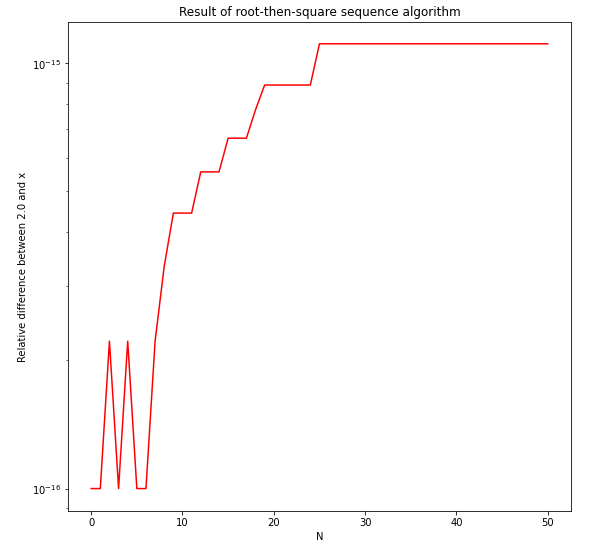

Notably the error barely rises above 1e-15, this is *much* better than the limit of 1e-13 we were required to have. 

We recognize that we were definitely abusing the computer algebra system, we calculated 100 terms of the Taylor Series every time, however we were never told how many terms we could retain. That said, when we tried to lower to 10 terms, the error was not satisfacotry, but by the time we kept 30 terms it was just fine. 

We also, for the heck of it, decided to take 100 terms out to N=1000. At some point the error is unable to get any higher, meaning there is some kind of cap that prevents the value from getting any worse even if we *do* evolve it forever. One wonders why that is--we can even see it in the graph above, at around N=30 where it flatlines and then stays flat forever. It is quite curious. 

Regardless, the problem is now complete, everything has been calculated to and plotted to our satisfaction. 